In [1]:
import pandas as pd
import numpy as np

In [2]:
#- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
#(You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [3]:
#- Now we will try to check the normality of the numerical variables visually
 # - Use seaborn library to construct distribution plots for the numerical variables
  #- Use Matplotlib to construct histograms
  #- Do the distributions for different numerical columns look symmetrical? Compute the skewness for each, and add a comment with your findings.

In [4]:
#- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 

In [5]:
#- If you find a pair of columns that show a high correlation between them (greater than 0.9), drop the one that is less correlated with the column `total_claim_amount`. Write code for both the correlation matrix. If there is no pair of features that have a high correlation, then do not drop any features.

In [6]:
#- Plot the heatmap of the correlation matrix after the filtering.

In [7]:
df= pd.read_csv('marketing_customer_analysis.csv')

In [8]:
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [9]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [10]:
df.columns=df.columns.str.lower()
df.columns= [col.replace(' ', '_') for col in df.columns]

In [11]:
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [12]:
#- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
#(You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [14]:
numerics =['float64', 'int64']
numerical_dataframe= df.select_dtypes(include=numerics)
display(numerical_dataframe)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [15]:
categoricals = ['object']
categorical_dataframe= df.select_dtypes(include= categoricals)
display(categorical_dataframe)

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [16]:
#- Now we will try to check the normality of the numerical variables visually
 # - Use seaborn library to construct distribution plots for the numerical variables
  #- Use Matplotlib to construct histograms
  #- Do the distributions for different numerical columns look symmetrical? Compute the skewness for each, and add a comment with your findings.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

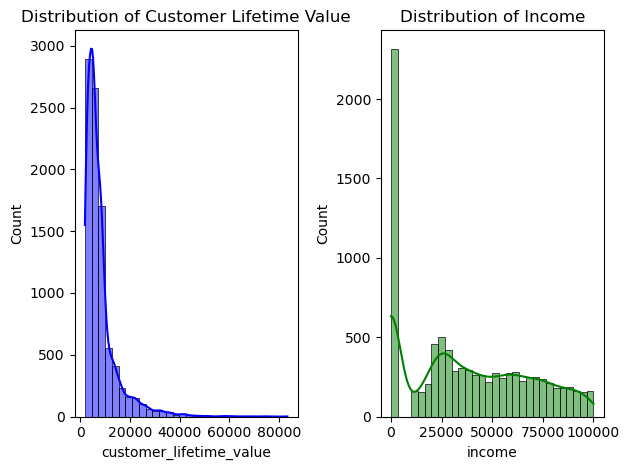

In [18]:
plt.subplot(1, 2, 1)
sns.histplot(df['customer_lifetime_value'], kde=True, color='blue', bins=30)
plt.title('Distribution of Customer Lifetime Value')

plt.subplot(1, 2, 2)
sns.histplot(df['income'], kde=True, color='green', bins=30)
plt.title('Distribution of Income')

plt.tight_layout()
plt.show()

In [19]:
from scipy.stats import skew

skewness_premium = skew(df['customer_lifetime_value'])
skewness_claim = skew(df['income'])

print("Skewness (Customer Lifetime Value):", skewness_premium)
print("Skewness (Income):", skewness_claim)

Skewness (Customer Lifetime Value): 3.031782271327885
Skewness (Income): 0.28684016057807576


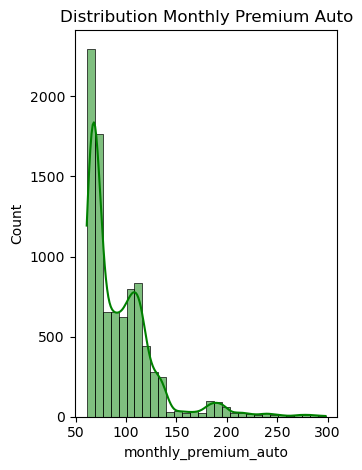

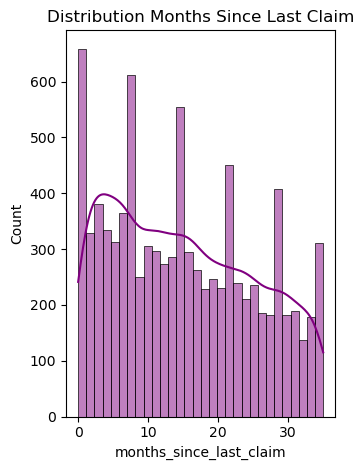

In [20]:
plt.subplot(1,2,1)
sns.histplot(df['monthly_premium_auto'], kde=True, color='green', bins= 30)
plt.title('Distribution Monthly Premium Auto')
plt.tight_layout()
plt.show()

plt.subplot(1,2,2)
sns.histplot(df['months_since_last_claim'], kde=True, color='purple', bins= 30)
plt.title('Distribution Months Since Last Claim')
plt.tight_layout()
plt.show()

In [21]:
skewness_premium = skew(df['monthly_premium_auto'])
skewness_claim = skew(df['months_since_last_claim'])

print("Skewness (Monthly Premium Auto):", skewness_premium)
print("Skewness (Months Since Last Claim):", skewness_claim)


Skewness (Monthly Premium Auto): 2.123197701864424
Skewness (Months Since Last Claim): 0.2785405598366762


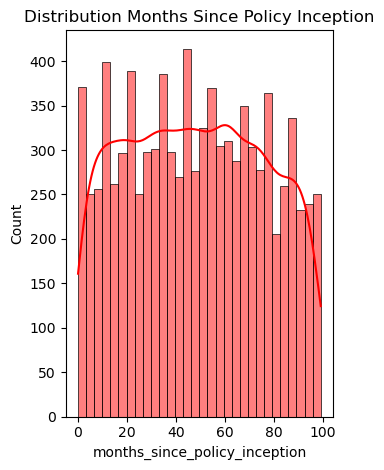

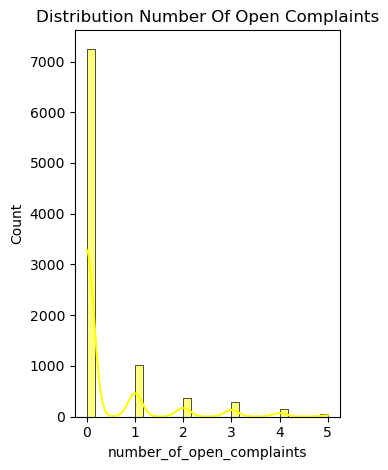

In [22]:
plt.subplot(1,2,1)
sns.histplot(df['months_since_policy_inception'], kde=True, color='red', bins= 30)
plt.title('Distribution Months Since Policy Inception')
plt.tight_layout()
plt.show()

plt.subplot(1,2,2)
sns.histplot(df['number_of_open_complaints'], kde=True, color='yellow', bins= 30)
plt.title('Distribution Number Of Open Complaints')
plt.tight_layout()
plt.show()

In [23]:
skewness_premium = skew(df['months_since_policy_inception'])
skewness_claim = skew(df['number_of_open_complaints'])

print("Skewness (Months Since Policy Inception):", skewness_premium)
print("Skewness (Number Of Open Complaints):", skewness_claim)


Skewness (Months Since Policy Inception): 0.040158365343045704
Skewness (Number Of Open Complaints): 2.7828059596647505


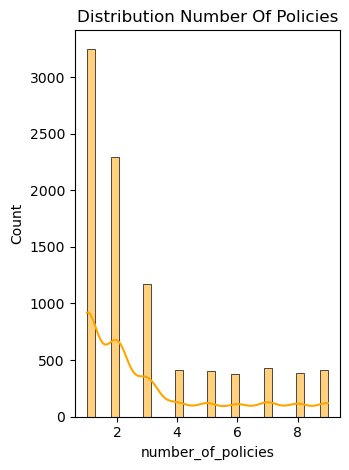

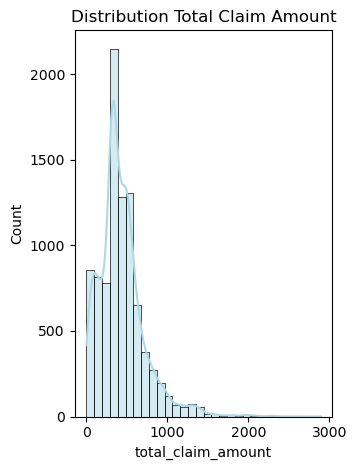

In [24]:
plt.subplot(1,2,1)
sns.histplot(df['number_of_policies'], kde=True, color='orange', bins= 30)
plt.title('Distribution Number Of Policies')
plt.tight_layout()
plt.show()

plt.subplot(1,2,2)
sns.histplot(df['total_claim_amount'], kde=True, color='lightblue', bins= 30)
plt.title('Distribution Total Claim Amount')
plt.tight_layout()
plt.show()

In [25]:
skewness_premium = skew(df['number_of_policies'])
skewness_claim = skew(df['total_claim_amount'])

print("Skewness (Number Of Policies):", skewness_premium)
print("Skewness (Total Claim Amount):", skewness_claim)


Skewness (Number Of Policies): 1.2531269015899718
Skewness (Total Claim Amount): 1.7146841624611302


In [26]:
for column in numerical_dataframe.columns:
    skewness = skew(numerical_dataframe[column])
    print(f'Skewness of {column}: {skewness:.2f}')
    if skewness > 0.5:
        comment = "Positive skew (right-tailed)"
    elif skewness < -0.5:
        comment = "Negative skew (left-tailed)"
    else:
        comment = "Approximately symmetrical distribution"
    print(f'Comment: {comment}\n')

Skewness of customer_lifetime_value: 3.03
Comment: Positive skew (right-tailed)

Skewness of income: 0.29
Comment: Approximately symmetrical distribution

Skewness of monthly_premium_auto: 2.12
Comment: Positive skew (right-tailed)

Skewness of months_since_last_claim: 0.28
Comment: Approximately symmetrical distribution

Skewness of months_since_policy_inception: 0.04
Comment: Approximately symmetrical distribution

Skewness of number_of_open_complaints: 2.78
Comment: Positive skew (right-tailed)

Skewness of number_of_policies: 1.25
Comment: Positive skew (right-tailed)

Skewness of total_claim_amount: 1.71
Comment: Positive skew (right-tailed)



In [27]:
#- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

predictors = df[['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']]

predictors_with_const = pd.concat([pd.Series(1, index=predictors.index, name='const'), predictors], axis=1)

vif_data = pd.DataFrame()
vif_data["Variable"] = predictors_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(predictors_with_const.values, i) for i in range(predictors_with_const.shape[1])]

print(vif_data)

                        Variable        VIF
0                          const  17.177738
1        customer_lifetime_value   1.190178
2                         income   1.002301
3           monthly_premium_auto   1.188198
4        months_since_last_claim   1.002828
5  months_since_policy_inception   1.002441
6      number_of_open_complaints   1.001420
7             number_of_policies   1.001295


In [29]:
correlation_matrix= numerical_dataframe.corr()
print(correlation_matrix)

                               customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.024366   
income                                        0.024366  1.000000   
monthly_premium_auto                          0.396262 -0.016665   
months_since_last_claim                       0.011517 -0.026715   
months_since_policy_inception                 0.009418 -0.000875   
number_of_open_complaints                    -0.036343  0.006408   
number_of_policies                            0.021955 -0.008656   
total_claim_amount                            0.226451 -0.355254   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.396262                 0.011517   
income                                    -0.016665                -0.026715   
monthly_premium_auto                       1.000000                 0.005026   
months_since_last_claim                    0.005026                

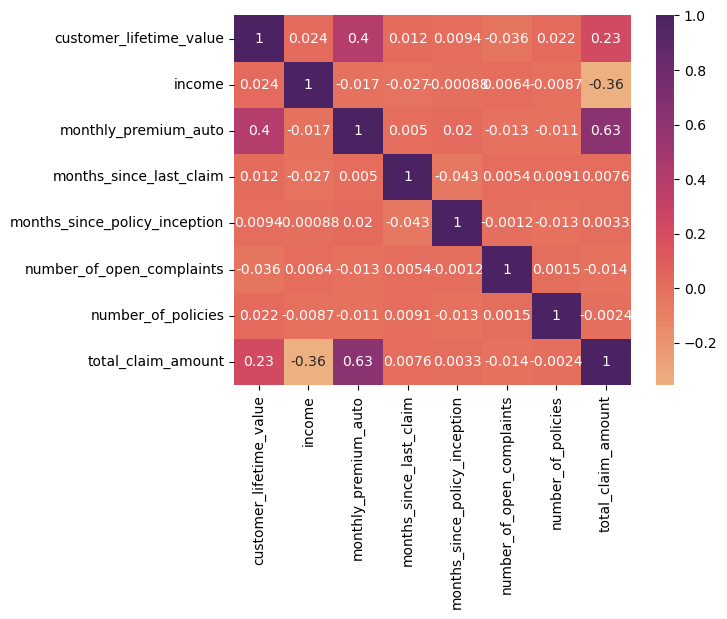

In [30]:
cmap = sns.color_palette('flare', as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap)
plt.show()

In [31]:
#- If you find a pair of columns that show a high correlation between them (greater than 0.9), drop the one that is less correlated with the column `total_claim_amount`. Write code for both the correlation matrix. If there is no pair of features that have a high correlation, then do not drop any features.
#- Plot the heatmap of the correlation matrix after the filtering.

In [32]:
#There weren't any columns that show high correlation between them